In [25]:
import pandas as pd
import pandas_datareader as web
import matplotlib.pyplot as plt
import datetime
import random
import numpy as np
import seaborn as sns
import plotly.express as px

In [26]:
tickers = ['RELIANCE.NS', 'TCS.NS', 'HDFCBANK.NS', 'HCLTECH.NS', 'ASIANPAINT.NS', 'HINDUNILVR.NS','BRITANNIA.NS'
          ,'^BSESN']
df = pd.DataFrame()
#Opening = pd.DataFrame()
Closing = pd.DataFrame()
today = datetime.date.today()
prev = datetime.timedelta(2000)
stock = []
for i in range(len(tickers)):
  try:
    temp = web.get_data_yahoo(tickers[i], today - prev)
    temp.dropna(inplace=True)
    df[tickers[i]] = temp['Volume']
#    Opening[tickers[i]] = temp['Open']
    Closing[tickers[i]] = temp['Close']
    stock.append(tickers[i])
  except:
    print("No info is available for this particular stock " + tickers[i])

In [27]:
Closing.rename(columns = {'^BSESN':'SENSEX.NS'},inplace=True)

In [28]:
Closing.rename(columns=lambda x: x[:-3], inplace=True)
Closing

,RELIANCE,TCS,HDFCBANK,HCLTECH,ASIANPAINT,HINDUNILVR,BRITANNIA,SENSEX
Date,,,,,,,,
2015-05-08,444.850006,1263.619995,491.000000,462.750000,759.400024,895.200012,1101.699951,27105.390625
2015-05-11,447.975006,1278.000000,495.149994,470.950012,771.650024,864.700012,1141.599976,27507.300781
2015-05-12,434.350006,1261.449951,485.975006,457.825012,758.349976,843.950012,1136.199951,26877.480469
2015-05-13,442.549988,1257.699951,495.125000,468.649994,762.500000,841.049988,1141.300049,27251.099609
2015-05-14,439.100006,1249.619995,495.524994,462.649994,796.450012,846.450012,1129.150024,27206.060547
...,...,...,...,...,...,...,...,...
2020-10-22,2106.949951,2671.149902,1233.300049,866.250000,2099.899902,2179.350098,3458.350098,40558.488281
2020-10-23,2113.050049,2686.800049,1235.800049,852.450012,2120.250000,2143.850098,3469.750000,40685.500000
2020-10-26,2029.099976,2688.199951,1210.900024,847.799988,2080.449951,2166.750000,3485.399902,40145.500000


In [29]:
def normalize(df):
  x = df.copy()
  for i in x.columns:
    x[i] = x[i]/x[i][0]
  return x

In [30]:
def plot_interactive_chart(df, title=None):
  fig = px.line(title = title)
  for i in Closing.columns:
    fig.add_scatter(x = df.index, y = df[i], name = i)
  fig.show()

In [31]:
plot_interactive_chart(Closing, "Stock Price Over Time")

In [32]:
def daily_returns_calc(df):
  daily_returns = df.copy()
  for index in Closing.columns:
    daily_returns[index] = df[index].pct_change(1)
    daily_returns[index][0] = 0
  
  return daily_returns


In [33]:
daily_returns = daily_returns_calc(Closing)
daily_returns

,RELIANCE,TCS,HDFCBANK,HCLTECH,ASIANPAINT,HINDUNILVR,BRITANNIA,SENSEX
Date,,,,,,,,
2015-05-08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2015-05-11,0.007025,0.011380,0.008452,0.017720,0.016131,-0.034071,0.036217,0.014828
2015-05-12,-0.030415,-0.012950,-0.018530,-0.027869,-0.017236,-0.023997,-0.004730,-0.022896
2015-05-13,0.018879,-0.002973,0.018828,0.023644,0.005472,-0.003436,0.004489,0.013901
2015-05-14,-0.007796,-0.006424,0.000808,-0.012803,0.044525,0.006421,-0.010646,-0.001653
...,...,...,...,...,...,...,...,...
2020-10-22,-0.008308,-0.001589,-0.010748,-0.005511,-0.006811,0.007489,0.017985,-0.003656
2020-10-23,0.002895,0.005859,0.002027,-0.015931,0.009691,-0.016289,0.003296,0.003132
2020-10-26,-0.039729,0.000521,-0.020149,-0.005455,-0.018771,0.010682,0.004510,-0.013273


In [34]:
plot_interactive_chart(daily_returns, "Chart for Daily Returns")

In [35]:
daily_returns.mean()

RELIANCE      0.001299
TCS           0.000668
HDFCBANK      0.000771
HCLTECH       0.000590
ASIANPAINT    0.000908
HINDUNILVR    0.000760
BRITANNIA     0.001012
SENSEX        0.000353
dtype: float64

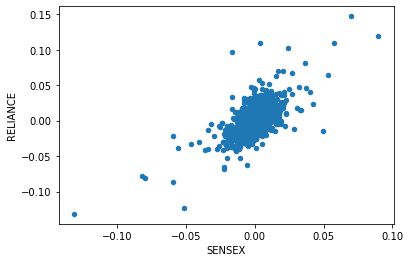

In [36]:
daily_returns.plot(kind='scatter', x = 'SENSEX', y='RELIANCE')

In [37]:
beta, alpha = np.polyfit(x = daily_returns['SENSEX'], y = daily_returns['RELIANCE'], deg=1)
print(f'Beta and alpha for the equation comes out to be {beta} and {alpha}')

Beta and alpha for the equation comes out to be 1.099140388087738 and 0.0009114167155552642


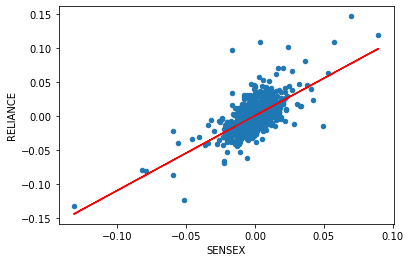

In [38]:
daily_returns.plot(kind='scatter', x = 'SENSEX', y='RELIANCE')
plt.plot(daily_returns['SENSEX'], beta * daily_returns['SENSEX'] + alpha, '-', color = 'r')

In [39]:
rm = (daily_returns['SENSEX'].mean() * 252) * 100

In [40]:
rf = 6
R_JUB = rf + (beta * (rm - rf))

Beta and alpha for stock RELIANCE is 1.099140388087738 and 0.0009114167155552642 respectively
Beta and alpha for stock TCS is 0.6259569649734664 and 0.0004468145118463275 respectively
Beta and alpha for stock HDFCBANK is 0.9642648580064627 and 0.0004304808643508424 respectively
Beta and alpha for stock HCLTECH is 0.6578513106012004 and 0.00035802838444340683 respectively
Beta and alpha for stock ASIANPAINT is 0.7599598111421666 and 0.0006399515563273915 respectively
Beta and alpha for stock HINDUNILVR is 0.6266509886198226 and 0.0005384791615519027 respectively
Beta and alpha for stock BRITANNIA is 0.7398465525328143 and 0.000750737647793722 respectively


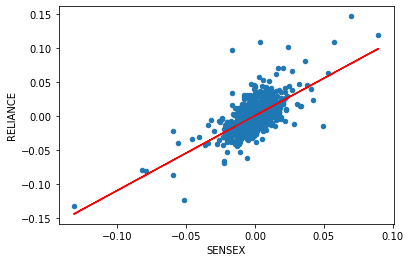

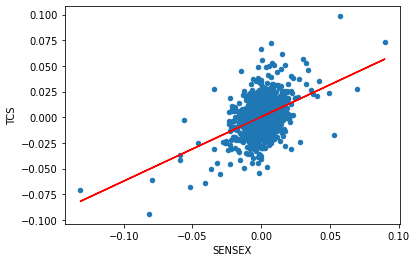

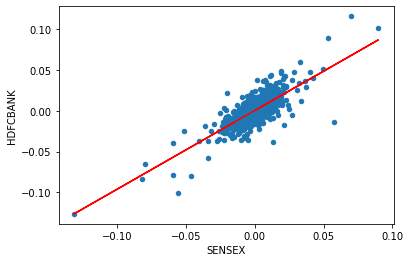

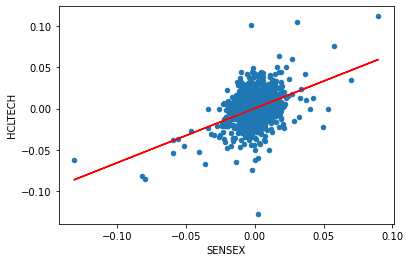

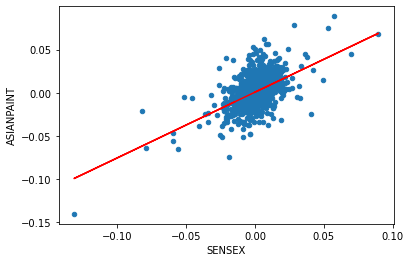

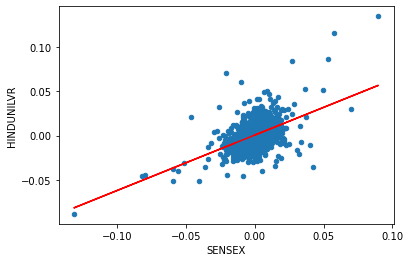

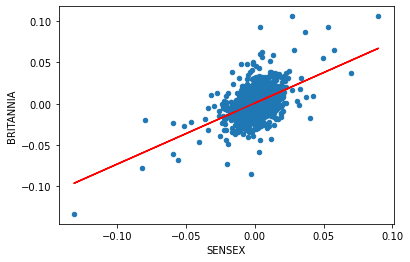

In [41]:
beta= {}
alpha = {}
for i in daily_returns.columns[:-1]:
  daily_returns.plot(kind='scatter', x = 'SENSEX', y=i)
  bet, alp = np.polyfit(x=daily_returns['SENSEX'], y = daily_returns[i], deg=1)
  plt.plot(daily_returns['SENSEX'], bet * daily_returns['SENSEX'] + alp, '-', color = 'r')

  beta[i] = bet
  alpha[i] = alp
  print(f'Beta and alpha for stock {i} is {bet} and {alp} respectively')


In [42]:
beta

{'ASIANPAINT': 0.7599598111421666,
 'BRITANNIA': 0.7398465525328143,
 'HCLTECH': 0.6578513106012004,
 'HDFCBANK': 0.9642648580064627,
 'HINDUNILVR': 0.6266509886198226,
 'RELIANCE': 1.099140388087738,
 'TCS': 0.6259569649734664}

In [43]:
alpha

{'ASIANPAINT': 0.0006399515563273915,
 'BRITANNIA': 0.000750737647793722,
 'HCLTECH': 0.00035802838444340683,
 'HDFCBANK': 0.0004304808643508424,
 'HINDUNILVR': 0.0005384791615519027,
 'RELIANCE': 0.0009114167155552642,
 'TCS': 0.0004468145118463275}

In [47]:
for i in daily_returns.columns[:-1]:
  fig = px.scatter(daily_returns, x='SENSEX', y = i, title=i,hover_name=daily_returns.index)
  bet, alp = np.polyfit(x=daily_returns['SENSEX'], y = daily_returns[i], deg=1)
  fig.add_scatter(x=daily_returns['SENSEX'], y = bet * daily_returns['SENSEX'] + alp)
  fig.show()

In [48]:
keys = list(beta.keys())
ER = {}
risk_free_rate = 5
rets = daily_returns['SENSEX'].mean() * 252 * 100
for i in keys:
  ER[i] = risk_free_rate + (beta[i] * (rets - risk_free_rate))


In [49]:
for i in keys:
  print(f'Expected return based on CAPM for stock {i} is {ER[i]} %')

Expected return based on CAPM for stock RELIANCE is 9.281292299594806 %
Expected return based on CAPM for stock TCS is 7.438182386038131 %
Expected return based on CAPM for stock HDFCBANK is 8.755934870644941 %
Expected return based on CAPM for stock HCLTECH is 7.562414938873531 %
Expected return based on CAPM for stock ASIANPAINT is 7.960140599605339 %
Expected return based on CAPM for stock HINDUNILVR is 7.4408856968481825 %
Expected return based on CAPM for stock BRITANNIA is 7.881796886520796 %
